In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv("C:/Users/athar/jupyter/alldataset/boston_train.csv")

In [26]:
df.head(5)

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [4]:
df.drop('ID',axis=1,inplace=True)

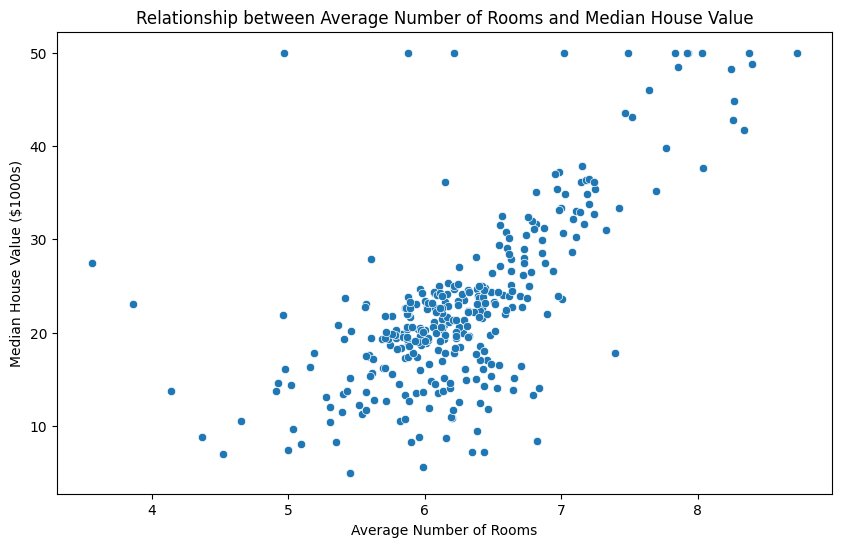

In [6]:
# Visualizing the relationship between RM (average number of rooms per dwelling) and MEDV
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rm', y='medv', data=df)
plt.title('Relationship between Average Number of Rooms and Median House Value')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value ($1000s)')
plt.show()

<Axes: >

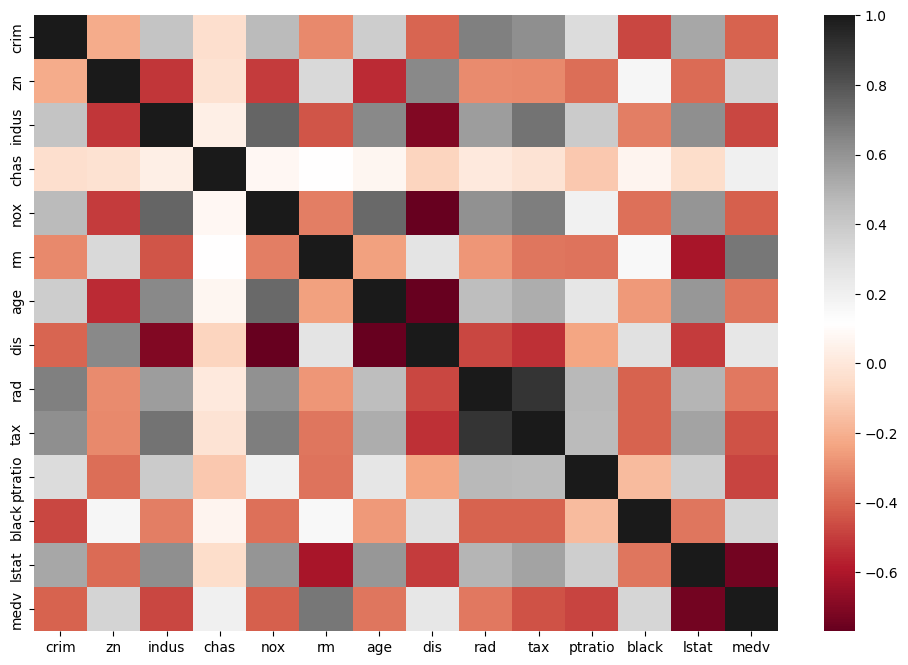

In [7]:
plt.subplots(figsize=(12,8))
sns.heatmap(df.corr(), cmap = 'RdGy')

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 


In [16]:
X=df.iloc[:, 1:14].values
y=df.iloc[:,-1].values

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4)


In [18]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [20]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='rm',y='medv',data=df)
plt.xlabel('Avg No of rooms ')
plt.ylabel('Price')

In [21]:
sns.pairplot(df,vars=['lstat','ptratio','tax','rad','age','nox','indus','crim'])
plt.show()

In [22]:
sns.pairplot(df,vars=['medv','black','dis','rm','chas','zn'])
plt.show()

In [67]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [30]:
predictions=lr.predict(X_test)
predictions

Text(0, 0.5, 'Predicated value')

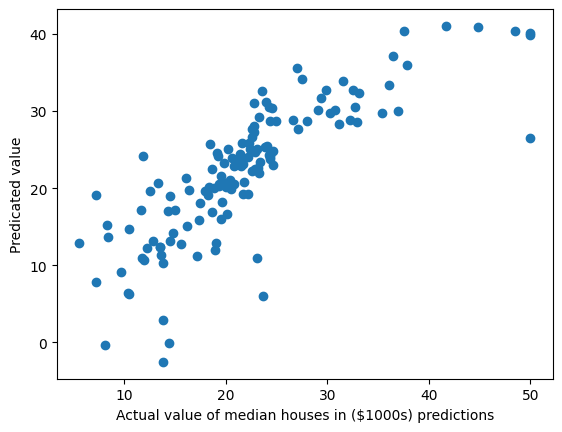

In [94]:
plt.scatter(y_test,predictions)
plt.xlabel('Actual value of median houses in ($1000s) predictions' )
plt.ylabel('Predicated value')

In [96]:
from sklearn import metrics

In [99]:
print('MSE',metrics.mean_absolute_error(y_test,predictions))
print('MSE',metrics.mean_squared_error(y_test,predictions))
print('R2 score',metrics.r2_score(y_test,predictions))

MSE 3.7308460276582927
MSE 28.59650324497277
R2 score 0.627518288089351


In [25]:
plt.figure(figsize=(12,8))
sns.histplot(data=df['medv'],kde=True,bins=30,color='blue')
plt.title("Distribution of hosuing value")
plt.xlabel("median houses value")
plt.ylabel("frequency Distri")

In [33]:
# # # Distplot is a combination of a histogram with a line (density plot) on it. Distplot is also used for visualizing the distribution of a single variable(univariate distribution). In distplot, the y-axis represents density. So the histogram height shows a density rather than a count.
sns.distplot(y_test-predictions,bins=50)